# Processo de Poisson

No processo de Poisson, o tempo entre eventos segue uma distribuição exponencial, que está associada à propriedade de falta de memória, $T\sim Exp(\lambda)$. <br>
A distribuição exponencial é dada por:
$$
f(t) = \begin{cases} 
\lambda e^{-\lambda t}, \quad t \geq 0 \\ 
0, \quad t < 0.
\end{cases}
$$
onde $\lambda$ é a taxa. 
A propriedade de falta de memória:
$$
P(T > t+s | T > s) = P(T > t).
$$
Além disso, o número de eventos que ocorrem em um intervalo de tempo $t$, $N(t)$, segue a distribuição de Poisson com taxa $\lambda$,
$$
P[N(t) = k] = \frac{e^{-\lambda t} (\lambda t)^k}{k!},
$$
sendo a taxa
$$
\lambda = E[N(t)]/t.
$$

Assm, para simularmos o processo de Poisson, os tempos em que os eventos ocorrem, sendo que o tempo entre eventos tem distribuição exponencial.

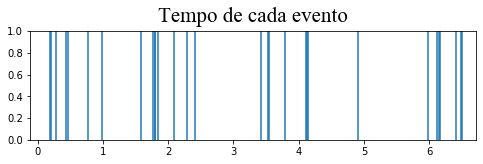

In [26]:
import matplotlib.pyplot as plt
import numpy as np
rate = 5 # taxa
n = 30 # numbero de eventos
T = np.zeros(n) # vetor que armazena os tempos entre eventos
te = 0
for i in range(n):
    ti = np.random.exponential(1/rate)
    te = te + ti
    T[i]=te
plt.figure(figsize=(8,2))
plt.title("Tempo de cada evento", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
for t in T:
    plt.axvline(x=t)
plt.show(True)

Podemos ainda obter a evolução do número de eventos em cada intervalo de tempo com comprimento $t$. A probabilidade de ocorrer $k$ eventos em um intervalo $t$ é:
$$
P(N(t) = k) = \frac{e^{-\lambda t} (\lambda t)^k}{k!}
$$

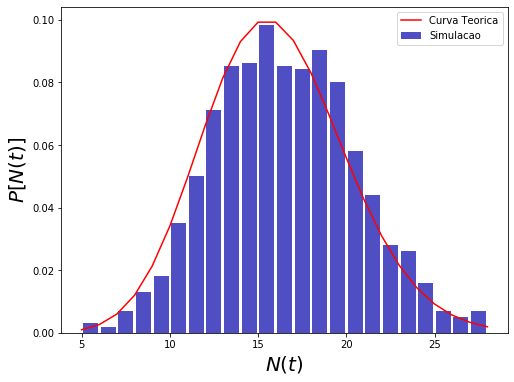

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import math as math

rate = 4
tmax = 4
nsim = 1000
Ns = []
for s in range(0,nsim):
    te = 0
    ne = 0
    while (te < tmax):
        te = te + np.random.exponential(1/rate)
        if(te < tmax):
            ne = ne + 1
    Ns.append(ne)
plt.figure(figsize=(8,6))
bins = range(np.min(Ns), np.max(Ns))
plt.hist(x=Ns, bins=bins,color='#0504aa', alpha=0.7, rwidth=0.85, density = True, label='Simulacao')
plt.xlabel(r'$N(t)$', fontsize=20)
plt.ylabel(r'$P[N(t)]$', fontsize=20)

x = range(np.min(Ns),np.max(Ns))
P = []
for k in x:
    prob = (np.exp(-rate*tmax)*(rate*tmax)**k)/math.factorial(k)
    P.append(prob)
plt.plot(x,P, color = 'red', label='Curva Teorica')
plt.legend()
plt.show(True)

Podemos mostrar ainda a evolução do número de eventos ao longo do tempo. Notem que a evolução da curva depende da taxa $\lambda$.

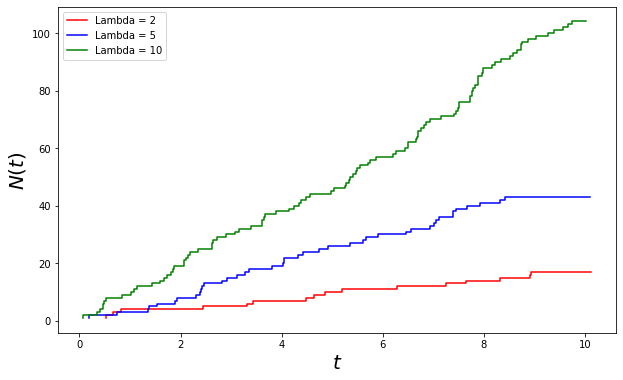

In [29]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['red','blue','green']
rates = [2,5,10]
tmax = 10
plt.figure(figsize=(10,6))
aux = 0
for rate in rates:
    N = []
    T = []
    ne = 0
    te = 0
    while (te < tmax):
        te = te + np.random.exponential(1/rate)
        if(te < tmax):
           ne = ne + 1
        N.append(ne)
        T.append(te)
    plt.step(T, N, color = colors[aux], label = "Lambda = %d"%rate)
    aux = aux + 1
plt.legend()
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$N(t)$', fontsize=20)
plt.show(True)

## Lei dos eventos raros

$$
\lim_{n\rightarrow \infty} \frac{n!}{(n-k)!k!}\left( \frac{\lambda t}{n}\right)^k \left( 1 - \frac{\lambda t}{n}\right)^{n-k} = \frac{e^{-\lambda t} (\lambda t)^k}{k!} = P(N(t) = k)
$$

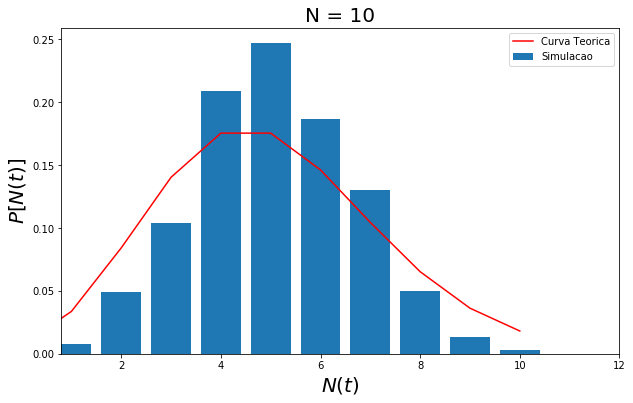

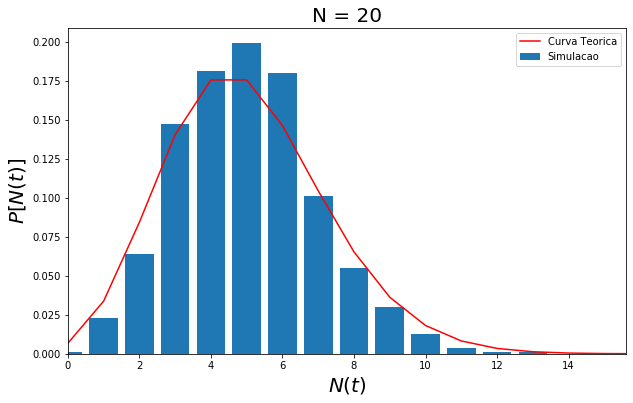

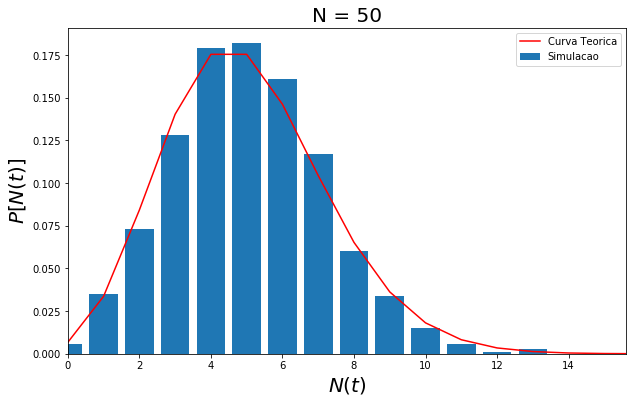

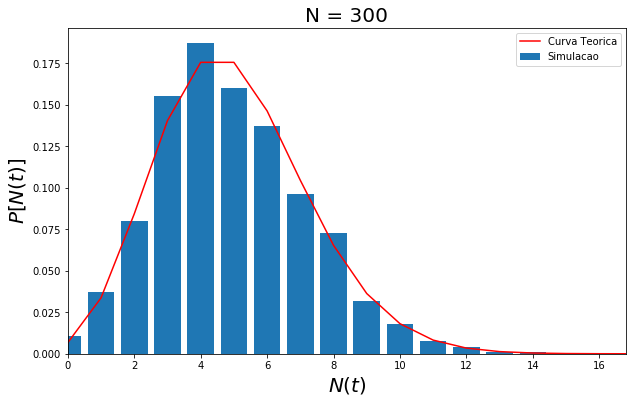

In [30]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import factorial

import math

seed(100) # semente do gerador de números aleatórios
t = 1
rate = 5
N = [10, 20, 50, 300]
for n in N:
    p = rate*t/n
    Pk = np.zeros(n+1)
    vk = np.arange(0,n+1)
    ns = 1000 # numero de simulacoes

    for j in range(0,ns): # faça para ns simulacoes
        S = 0 # numero de sucessos
        for i in range(0,n): # faça para n experimentos
            r = np.random.uniform() #
            if(r <= p): # se o sucesso
                S = S + 1
        Pk[S] = Pk[S] + 1
    Pk=Pk/sum(Pk) # normaliza a distribuição de probabilidade
    #plt.plot(vk, Pk, 'ro')
    plt.figure(figsize=(10,6))
    plt.xlim(0.8*np.min(vk[Pk>0]),1.2*np.max(vk[Pk>0]))
    plt.bar(vk, Pk, label='Simulacao')

    # curva teórica
    x = range(0,n+1)
    P = []
    #rate = n*p
    for k in x:
        prob = (np.exp(-rate*t)*(rate*t)**k)/factorial(k)
        P.append(prob)
    plt.plot(x,P, color = 'red', label='Curva Teorica')
    plt.title('N = ' + str(n), fontsize=20)
    plt.legend()
    plt.xlabel(r'$N(t)$', fontsize=20)
    plt.ylabel(r'$P[N(t)]$', fontsize=20)
    plt.show(True)

## Exemplos

**Exemplo**: Em uma loja, a taxa de chegada de homens é igual a $\lambda_1 = 5$ homens por hora e de mulheres, é igual a $\lambda_2 = 10$ mulheres por hora. Calcule a probabilidade de que a loja receberá 30 pessoas em duas horas.

In [31]:
import numpy as np
import math as math

t = 2
lbd1 = 5
lbd2 = 10
lbd = lbd1 + lbd2
k = 30
Prob = (np.exp(-lbd*t)*(lbd*t)**k)/math.factorial(k)
print('Probabilidade = ', Prob)

Probabilidade =  0.07263452647159149


Notem que embora seja baixa, essa probabilidade é a maior possível, pois é calculada no valor médio $\lambda t$.

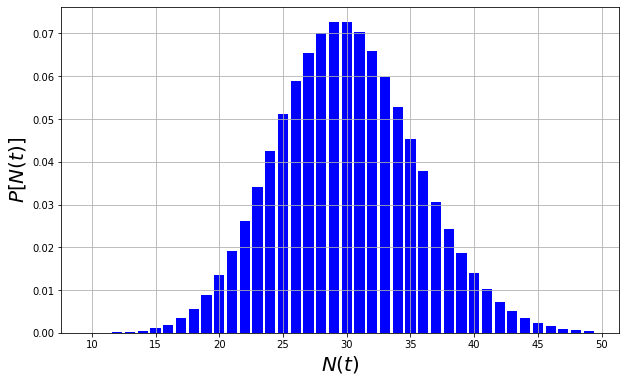

In [32]:
import matplotlib.pyplot as plt

t = 2
lbd1 = 5
lbd2 = 10
lbd = lbd1 + lbd2

P = []
vk = []
for k in range(10, 50):
    Prob = (np.exp(-lbd*t)*(lbd*t)**k)/math.factorial(k)
    P.append(Prob)
    vk.append(k)
plt.figure(figsize=(10,6))
plt.bar(vk, P, color = 'blue')
plt.xlabel(r'$N(t)$', fontsize=20)
plt.ylabel(r'$P[N(t)]$', fontsize=20)
plt.grid(True)
plt.show(True)